# Melanoma_Detection_Case_Study

### Problem STatement:
    
To build a CNN based model which can accurately detect melanoma.Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution that can evaluate images and alert dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

In [2]:
#Importing all the important libraries

import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPool2D

from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
import warnings
warnings.filterwarnings('ignore')
tf.get_logger().setLevel('ERROR')

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')


Mounted at /content/gdrive/


In [3]:
root_path = "/content/gdrive/My Drive/APP/Skin cancer ISIC The International Skin Imaging Collaboration"
data_dir_train = pathlib.Path(root_path + '/Train')
data_dir_test = pathlib.Path(root_path + '/Test')

In [4]:
print("Train dataset path :",data_dir_train)
print("Test dataset path :",data_dir_test)

Train dataset path : /content/gdrive/My Drive/APP/Skin cancer ISIC The International Skin Imaging Collaboration/Train
Test dataset path : /content/gdrive/My Drive/APP/Skin cancer ISIC The International Skin Imaging Collaboration/Test


In [5]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print("Total train images :",image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print("Total test images :",image_count_test)

Total train images : 2239
Total test images : 118


Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

Create a dataset

In [6]:

batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [7]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split = 0.2,
    subset= "training",
    seed=123,
    image_size=(img_height,img_width),
    batch_size=batch_size)




Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [8]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [9]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


Visualize the data
Todo, create a code to visualize one instance of all the nine classes present in the dataset


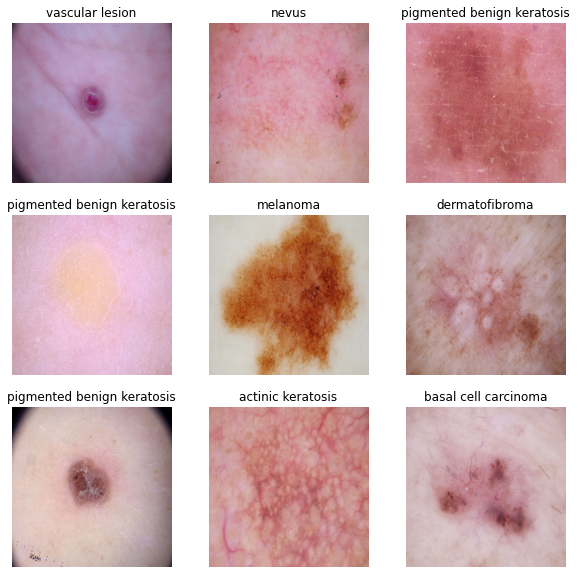

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

#### The image_batch is a tensor of the shape (32, 180, 180, 3). This is a batch of 32 images of shape 180x180x3 (the last dimension refers to color channels RGB). 
#### The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.




##### Dataset.cache() keeps the images in memory after they're loaded off disk during the first epoch.

##### Dataset.prefetch() overlaps data preprocessing and model execution while training.

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
     

#### Create the model

Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. 

- Use layers.experimental.preprocessing.Rescaling to normalize pixel values between (0,1). 

- The RGB channel values are in the [0, 255] range. 

- This is not ideal for a neural network. Here, it is good to standardize values to be in the [0, 1]





In [12]:
preprocessing_layers = [
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180, 180, 3))
]

In [13]:
### Your code goes here

num_classes = 9
input_shape = (180,180,3)
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180, 180,3))
])
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

## Number of classes is 9
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 32)        9248      
                                                                 
 batch_normalization (BatchN  (None, 90, 90, 32)       128       
 ormalization)                                          

Compile the model

Choose an appropirate optimiser and loss function for model training

In [14]:
### Todo, choose an appropirate optimiser and loss function

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 32)        9248      
                                                                 
 batch_normalization (BatchN  (None, 90, 90, 32)       128       
 ormalization)                                          

Train the model

In [16]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 208s 866ms/step - loss: 2.3047 - accuracy: 0.3689 - val_loss: 2.4010 - val_accuracy: 0.0403
Epoch 2/20
56/56 [==============================] - 3s 58ms/step - loss: 1.6615 - accuracy: 0.4888 - val_loss: 2.4992 - val_accuracy: 0.0671
Epoch 3/20
56/56 [==============================] - 3s 58ms/step - loss: 1.5865 - accuracy: 0.5162 - val_loss: 2.7029 - val_accuracy: 0.1029
Epoch 4/20
56/56 [==============================] - 3s 57ms/step - loss: 1.4525 - accuracy: 0.5485 - val_loss: 2.1805 - val_accuracy: 0.2260
Epoch 5/20
56/56 [==============================] - 3s 59ms/step - loss: 1.1433 - accuracy: 0.6194 - val_loss: 2.4530 - val_accuracy: 0.1655
Epoch 6/20
56/56 [==============================] - 3s 57ms/step - loss: 1.0809 - accuracy: 0.6445 - val_loss: 2.6020 - val_accuracy: 0.3087
Epoch 7/20
56/56 [==============================] - 3s 57ms/step - loss: 0.9324 - accuracy: 0.6830 - val_loss: 2.4078 - val_accuracy: 0.2707
Epoch 8/20

Model Overfit or Underfit?

In [17]:
loss, accuracy = model.evaluate(train_ds, verbose=1,)
loss_v, accuracy_v = model.evaluate(val_ds, verbose=1)

print("Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss: ",loss)
print("Validation Loss", loss_v)


# Thus we can clearly that model Overfit and we need to chose right data augumentation strategy

14/14 [==============================] - 0s 16ms/step - loss: 2.8198 - accuracy: 0.4676
Accuracy:  0.7935267686843872
Validation Accuracy:  0.4675615131855011
Loss:  0.6385204195976257
Validation Loss 2.8198297023773193


Visualizing training results

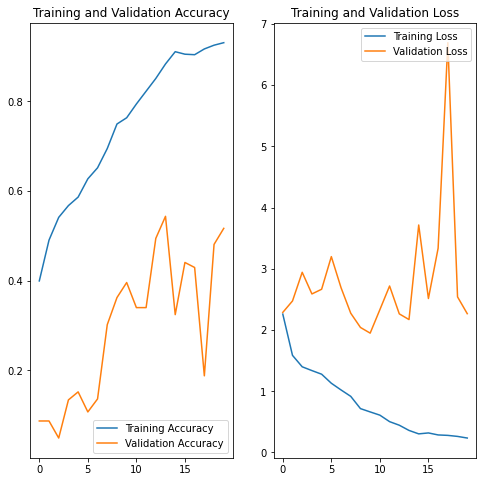

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [18]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
data_augument = keras.Sequential([
                             layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
                             layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
                             layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])

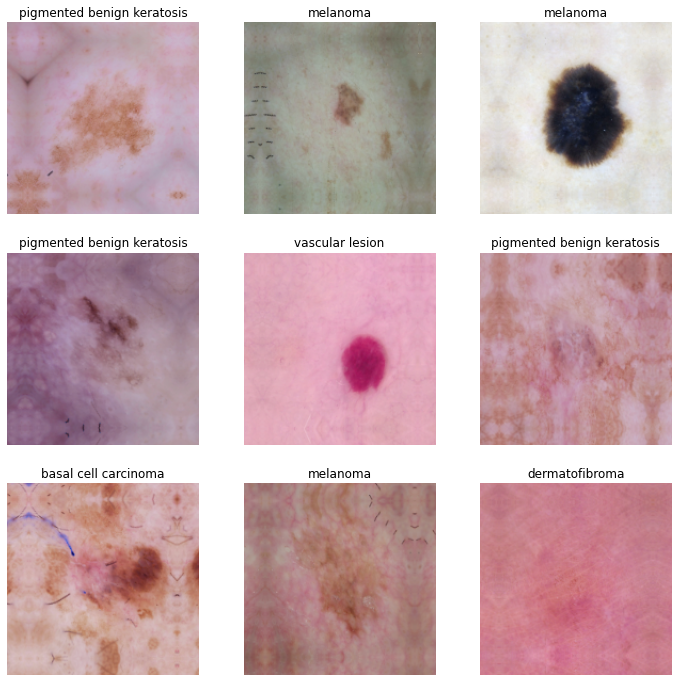

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.

plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_augument(images)[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")


Todo:

Create the model, compile and train the model

In [19]:
## You can use Dropout layer for the augumented data if there is an evidence of overfitting in your findings
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([ data_augument,
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
      
])
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

Compiling the model

In [20]:
### Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs
epochs= 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 20s 252ms/step - loss: 2.1019 - accuracy: 0.1685 - val_loss: 2.0518 - val_accuracy: 0.1924
Epoch 2/20
56/56 [==============================] - 14s 249ms/step - loss: 2.0335 - accuracy: 0.2003 - val_loss: 2.0567 - val_accuracy: 0.1544
Epoch 3/20
56/56 [==============================] - 15s 265ms/step - loss: 2.0068 - accuracy: 0.2243 - val_loss: 1.9137 - val_accuracy: 0.2975
Epoch 4/20
56/56 [==============================] - 14s 245ms/step - loss: 1.9115 - accuracy: 0.2852 - val_loss: 1.8492 - val_accuracy: 0.2908
Epoch 5/20
56/56 [==============================] - 14s 245ms/step - loss: 1.7638 - accuracy: 0.3438 - val_loss: 1.6580 - val_accuracy: 0.4228
Epoch 6/20
56/56 [==============================] - 14s 244ms/step - loss: 1.6845 - accuracy: 0.3917 - val_loss: 1.7105 - val_accuracy: 0.3557
Epoch 7/20
56/56 [==============================] - 14s 244ms/step - loss: 1.6084 - accuracy: 0.4224 - val_loss: 1.5659 - val_accuracy: 0.4497

Visualizing the results

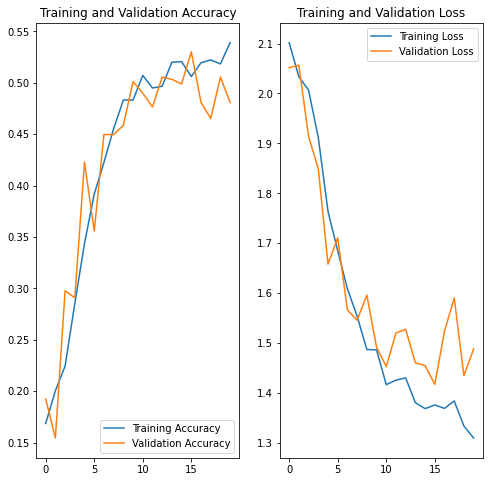

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Todo:

Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?


 Finding from Second Model :

-  **The overfitting issue is solved.**

-  **But the  validation accuracy is dropped as compare to the previous model**





Todo: Find the distribution of classes in the training dataset.

Context: Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

<BarContainer object of 9 artists>

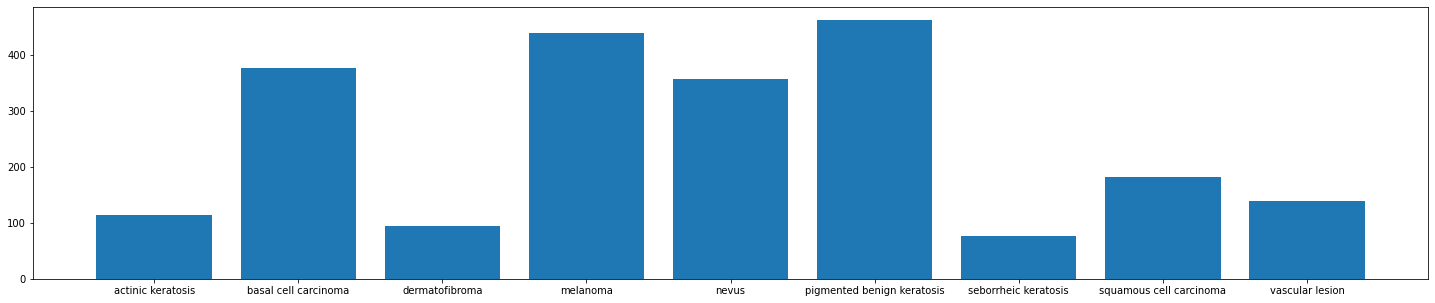

In [21]:
count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,5))
plt.bar(class_names,count)


Todo: Write your findings here:

seborrheic has least number of samples.



Todo: Rectify the class imbalance

Context:
 You can use a python package known as Augmentor (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [22]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:

#path_to_training_dataset="/content/gdrive/My Drive/APP/Skin cancer ISIC The International Skin Imaging Collaboration /Train"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline("/content/gdrive/My Drive/APP/Skin cancer ISIC The International Skin Imaging Collaboration/Train",save_format='jpg')
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/My Drive/APP/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F9BF7AC8DC0>: 100%|██████████| 500/500 [01:06<00:00,  7.54 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/My Drive/APP/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F9C08529DC0>: 100%|██████████| 500/500 [00:49<00:00, 10.00 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/My Drive/APP/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F9C0832DA30>: 100%|██████████| 500/500 [00:53<00:00,  9.29 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/My Drive/APP/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F9C081F47F0>: 100%|██████████| 500/500 [00:55<00:00,  8.98 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/My Drive/APP/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F9C082B2C70>: 100%|██████████| 500/500 [00:44<00:00, 11.29 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/My Drive/APP/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F9C600CAFA0>: 100%|██████████| 500/500 [00:51<00:00,  9.65 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/My Drive/APP/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F9C6013F190>: 100%|██████████| 500/500 [00:43<00:00, 11.59 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/My Drive/APP/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=962x674 at 0x7F9BF825DC40>: 100%|██████████| 500/500 [00:51<00:00,  9.74 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/My Drive/APP/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F9C0822EA60>: 100%|██████████| 500/500 [00:49<00:00, 10.03 Samples/s]


In [24]:
data_dir_train1 = pathlib.Path("/content/gdrive/My Drive/APP/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output")
image_count_train1 = len(list(data_dir_train1.glob('*/*.jpg')))
print(image_count_train1)

4500


Todo: Train the model on the data created using Augmentor

In [25]:
batch_size = 32
img_height = 180
img_width = 180

In [26]:
import pathlib
data_dir_train1=pathlib.Path("/content/gdrive/My Drive/APP/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output")
#data_dir_train1=pathlib.Path("/content/gdrive/My Drive/APP/Skin cancer ISIC The International Skin Imaging Collaboration/Train")

In [27]:
data_dir_train1

PosixPath('/content/gdrive/My Drive/APP/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output')

Todo: Create a training dataset

In [28]:
image_count_train1 = len(list(data_dir_train1.glob('*/*.jpg')))
print(image_count_train1)

4500


In [29]:
data_dir_train1=pathlib.Path("/content/gdrive/My Drive/APP/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output")
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train1,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4500 files belonging to 9 classes.
Using 3600 files for training.


Todo: Create a validation dataset

In [30]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train1,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4500 files belonging to 9 classes.
Using 900 files for validation.


In [31]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([ 
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
      
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

In [32]:
## ### Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [33]:
epochs = 30
## Your code goes here, use 30 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
113/113 [==============================] - 26s 198ms/step - loss: 2.0582 - accuracy: 0.2125 - val_loss: 2.0391 - val_accuracy: 0.2111
Epoch 2/30
113/113 [==============================] - 21s 178ms/step - loss: 1.8085 - accuracy: 0.3414 - val_loss: 1.7381 - val_accuracy: 0.3611
Epoch 3/30
113/113 [==============================] - 22s 184ms/step - loss: 1.5619 - accuracy: 0.4350 - val_loss: 1.5763 - val_accuracy: 0.4633
Epoch 4/30
113/113 [==============================] - 21s 176ms/step - loss: 1.4867 - accuracy: 0.4600 - val_loss: 1.6490 - val_accuracy: 0.4144
Epoch 5/30
113/113 [==============================] - 22s 181ms/step - loss: 1.4827 - accuracy: 0.4597 - val_loss: 1.4655 - val_accuracy: 0.4756
Epoch 6/30
113/113 [==============================] - 21s 180ms/step - loss: 1.3963 - accuracy: 0.4981 - val_loss: 1.4122 - val_accuracy: 0.5289
Epoch 7/30
113/113 [==============================] - 23s 191ms/step - loss: 1.3254 - accuracy: 0.5317 - val_loss: 1.2884 - val_ac

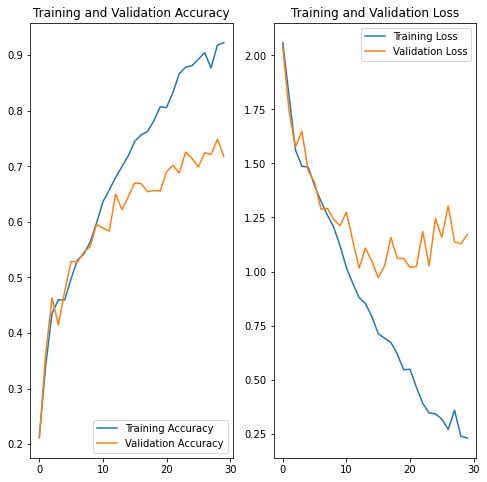

In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Todo: 
Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

- **Accuracy on training data has increased by using Augmentor library**

- **Model is still overfitting**

- **The problem of overfitting can be solved by add more layer,neurons or adding dropout layers.**

- **The Model can be further improved by tuning the hyperparameter.**